<a href="https://colab.research.google.com/github/Sergey7OV/CompoZit/blob/main/VKR_model_2_clean_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Построение моделей для прогноза модуля упругости при растяжении и прочности при растяжении на очищенном и нормализованном датасете из 23 значений

In [ ]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle

In [ ]:
#Cмонтируем весь Google Disk в Colab:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Загружаем объединенные, очищенные и нормализорванные датасеты
df_23_upr_norm = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/df_23_upr_norm_2.xlsx")
df_23_pr_norm = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/df_23_pr_norm_2.xlsx")
df_23_upr = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/df_23_upr_2.xlsx")
df_23_pr = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/df_23_pr_2.xlsx")
#Удаляем лишний столбец
df_23_upr_norm = df_23_upr_norm.drop(columns='Unnamed: 0')
df_23_pr_norm = df_23_pr_norm.drop(columns='Unnamed: 0')
df_23_upr = df_23_upr.drop(columns='Unnamed: 0')
df_23_pr = df_23_pr.drop(columns='Unnamed: 0')

df_23_upr_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Угол нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.400482,0.352484,0.375079,0.826869,0.086626,0.923077,0.325000,0.416667,0.555556,0.643478,0.799379,0.130435
std,0.273124,0.258058,0.234283,0.288061,0.206729,0.204837,0.386086,0.395285,0.317821,0.272740,0.207086,0.344350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185205,0.125000,0.233661,0.826869,0.000000,0.923077,0.000000,0.000000,0.555556,0.400000,0.742857,0.000000
50%,0.387657,0.357143,0.375079,1.000000,0.000000,1.000000,0.212500,0.416667,0.555556,0.700000,0.814286,0.000000
75%,0.589888,0.535714,0.430077,1.000000,0.086626,1.000000,0.325000,0.625000,0.555556,0.900000,0.857143,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_23_pr_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Угол нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.400482,0.352484,0.375079,0.826869,0.086626,0.923077,0.325000,0.546296,0.555556,0.643478,0.799379,0.130435
std,0.273124,0.258058,0.234283,0.288061,0.206729,0.204837,0.386086,0.413795,0.317821,0.272740,0.207086,0.344350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185205,0.125000,0.233661,0.826869,0.000000,0.923077,0.000000,0.166667,0.555556,0.400000,0.742857,0.000000
50%,0.387657,0.357143,0.375079,1.000000,0.000000,1.000000,0.212500,0.546296,0.555556,0.700000,0.814286,0.000000
75%,0.589888,0.535714,0.430077,1.000000,0.086626,1.000000,0.325000,1.000000,0.555556,0.900000,0.857143,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Разбиваем данные на обучающую и тестовую выборки
X_1 = df_23_upr_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
X_2 = df_23_pr_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_1 = df_23_upr_norm[['Модуль упругости при растяжении, ГПа']]
y_2 = df_23_pr_norm[['Прочность при растяжении, МПа']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)

print ('Тренировочная часть для Модуля упругости при растяжении: %d строк\nТестовая часть для Модуля упругости при растяжении:    : %d строк' % (X_train_1.shape[0], X_test_1.shape[0]))
print ('Тренировочная часть для Прочности при растяжении: %d строк\nТестовая часть для Прочности при растяжении    : %d строк' % (X_train_2.shape[0], X_test_2.shape[0]))

Тренировочная часть для Модуля упругости при растяжении: 18 строк
Тестовая часть для Модуля упругости при растяжении:    : 5 строк
Тренировочная часть для Прочности при растяжении: 18 строк
Тестовая часть для Прочности при растяжении    : 5 строк


Метод К ближайших соседей

In [ ]:
#Для Модуля упругости при растяжении
# Обучение модели на тренировочных данных
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_1, y_train_1)

# Прогнозирование значений на тестовых данных
y_pred_1 = knn.predict(X_test_1)


Text(0.5, 1.0, 'Модуль упругости при растяжении, ГПа')

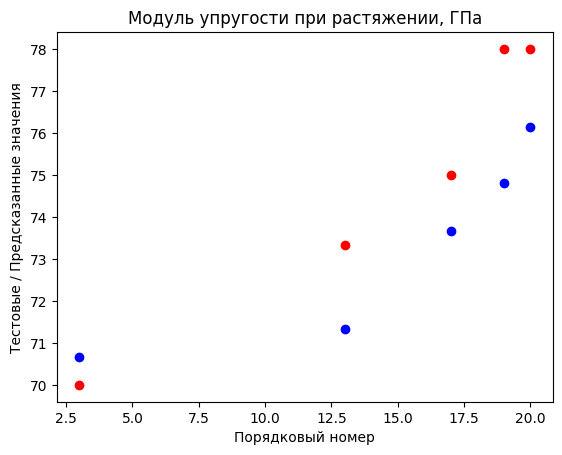

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
#Инвертирование значений из нормализованных
#Создаем ненормализованные значения 'Модуль упругости при растяжении, ГПа'
y_nonnorm_1 = df_23_upr[['Модуль упругости при растяжении, ГПа']]
min_max_scaler_1 = MinMaxScaler()
#Нормализуем значения с помощью MinMaxScaler
df_y = pd.DataFrame(min_max_scaler_1.fit_transform(y_nonnorm_1))

plt.scatter(y_test_1.index, min_max_scaler_1.inverse_transform(y_test_1), c = 'r')
plt.scatter(y_test_1.index, min_max_scaler_1.inverse_transform(y_pred_1), c = 'b')
plt.xlabel('Порядковый номер')
plt.ylabel('Тестовые / Предсказанные значения')
plt.title('Модуль упругости при растяжении, ГПа')

In [ ]:
#Запишем получившиеся данные по оценке качества модели метода K ближайших соседей для Модуля упругости при растяжении
models = pd.DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MSE': mean_squared_error(y_test_1, y_pred_1),
   'MAE': mean_absolute_error(y_test_1, y_pred_1), 
   'R2 score': r2_score(y_test_1, y_pred_1).round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, knr_upr_result])
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.062333,0.226667,0.563


In [ ]:
#Для прочности при растяжении
# Обучение модели на тренировочных данных 

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_2, y_train_2)

# Прогнозирование значений на тестовых данных
y_pred_2 = knn.predict(X_test_2)

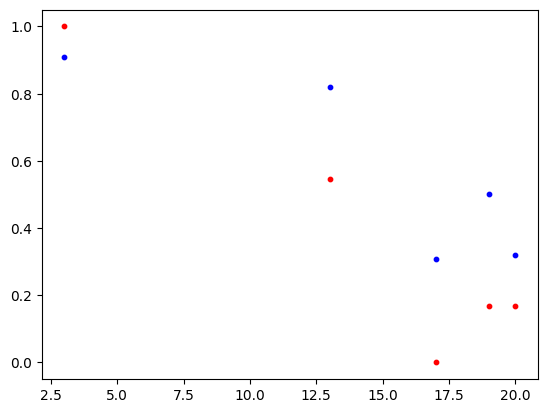

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_2.index, y_test_2, c = 'r', s = 10)
plt.scatter(y_test_2.index, y_pred_2, c = 'b', s = 10)

In [ ]:
#Запишем получившиеся данные по оценке качества модели метода K ближайших соседей для прочности при растяжении
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MSE': mean_squared_error(y_test_2, y_pred_2),
   'MAE': mean_absolute_error(y_test_2, y_pred_2), 
   'R2 score': r2_score(y_test_2, y_pred_2).round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, knr_pr_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.062333,0.226667,0.563
Прочность при растяжении,KNeighborsRegressor_pr,0.062430,0.231481,0.518


Стохастический градиентный спуск

In [ ]:
##Для Модуля упругости при растяжении
# Создание модели
sgd_1 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1, y_train_1.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_1 = grid.best_estimator_
y_pred_1 = sgd_1.predict(X_test_1)


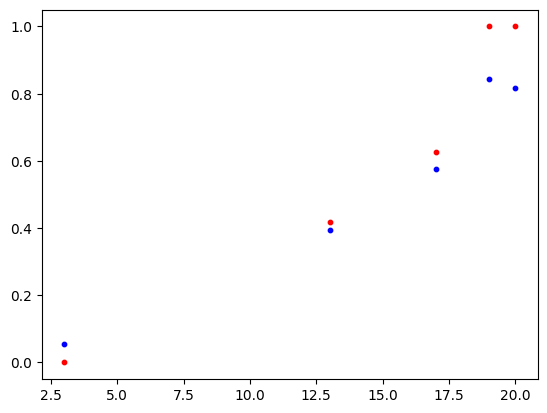

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_1.index, y_test_1, c = 'r', s = 10)
plt.scatter(y_test_1.index, y_pred_1, c = 'b', s = 10)

In [ ]:
#Запишем данные по оценке качества модели метода Стохастический градиентный спуск для модуля упругости при растяжении
sgd_1_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MSE': mean_squared_error(y_test_1, y_pred_1),
   'MAE': mean_absolute_error(y_test_1, y_pred_1),
   'R2 score': sgd_1.score(X_test_1, y_test_1).round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, sgd_1_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.062333,0.226667,0.563
Прочность при растяжении,KNeighborsRegressor_pr,0.062430,0.231481,0.518
Модуль упругости при растяжении,SGDRegressor_upr,0.012840,0.093105,0.910


In [ ]:
# Прочность при растяжении
# Создание модели
sgd_2 = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_2, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_2, y_train_2.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_2 = grid.best_estimator_
y_pred_2 = sgd_2.predict(X_test_2)

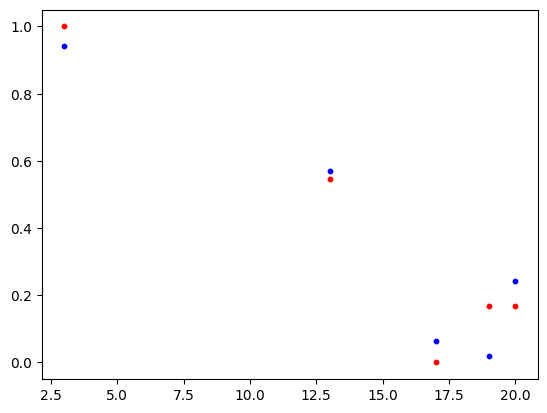

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_2.index, y_test_2, c = 'r', s = 10)
plt.scatter(y_test_2.index, y_pred_2, c = 'b', s = 10)

In [ ]:
#Запишем данные по оценке качества модели метода Стохастический градиентный спуск для Прочности при растяжении
sgd_2_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MSE': mean_squared_error(y_test_2, y_pred_2),
   'MAE': mean_absolute_error(y_test_2, y_pred_2),
   'R2 score': sgd_2.score(X_test_2, y_test_2).round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, sgd_2_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.062333,0.226667,0.563
Прочность при растяжении,KNeighborsRegressor_pr,0.062430,0.231481,0.518
Модуль упругости при растяжении,SGDRegressor_upr,0.012840,0.093105,0.910
Прочность при растяжении,SGDRegressor_pr,0.007002,0.073529,0.946


Линейная регрессия

In [ ]:
#Линейная регрессия 1 - Модуль упругости при растяжении
# Обучаем модель линейной регресси на тренировочных данных
linear = LinearRegression().fit(X_train_1, y_train_1)

# Оцениваем модель, используя тестовые данные. Обученная модель запускается в X_test и извлекаются показатели.
y_pred_1 = linear.predict(X_test_1)

y_train_1_pred = linear.predict(X_train_1)


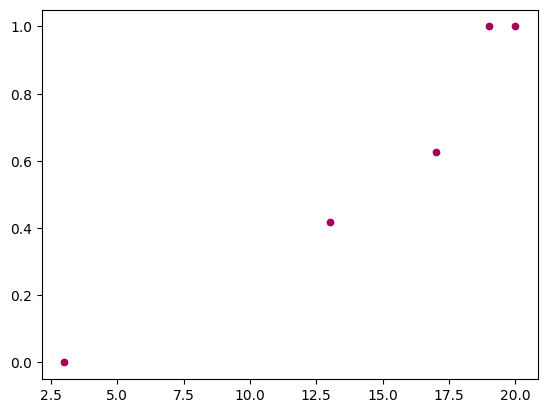

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_1.index, y_test_1, c = 'r', s = 20)
plt.scatter(y_test_1.index, y_pred_1, c = 'b', s = 20, alpha = 0.3)




In [ ]:
#Запишем данные по оценке качества модели метода Линейная регрессия  для Модуля упругости при растяжении
y_pred_1_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MSE': mean_squared_error(y_test_1, y_pred_1),
   'MAE': mean_absolute_error(y_test_1, y_pred_1),
   'R2 score': linear.score(X_test_1, y_test_1).round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, y_pred_1_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,6.233333e-02,2.266667e-01,0.563
Прочность при растяжении,KNeighborsRegressor_pr,6.243004e-02,2.314815e-01,0.518
Модуль упругости при растяжении,SGDRegressor_upr,1.283970e-02,9.310538e-02,0.910
Прочность при растяжении,SGDRegressor_pr,7.001937e-03,7.352911e-02,0.946
Модуль упругости при растяжении,LinearRegression_upr,2.954099e-29,3.141931e-15,1.000


In [ ]:
#линейная регрессия 2 -	Прочность при растяжении, МПа
# Обучаем модель линейной регресси на тренировочных данных
linear = LinearRegression().fit(X_train_2, y_train_2)

# Оцениваем модель, используя тестовые данные. Обученная модель запускается в X_test и извлекаются показатели.
y_pred_2 = linear.predict(X_test_2)
y_train_2_pred = linear.predict(X_train_2)



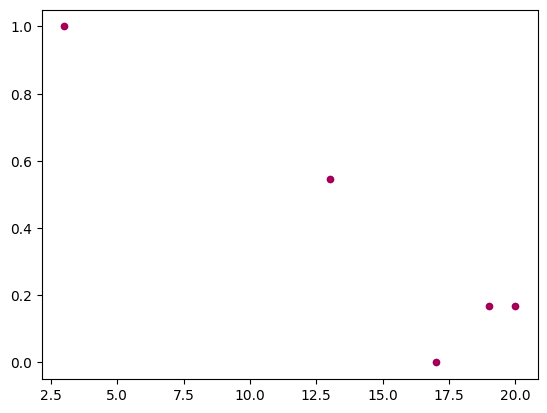

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_2.index, y_test_2, c = 'r', s = 20)
plt.scatter(y_test_2.index, y_pred_2, c = 'b', s = 20, alpha = 0.3)

In [ ]:
y_pred_2_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MSE': mean_squared_error(y_test_2, y_pred_2),
   'MAE': mean_absolute_error(y_test_2, y_pred_2),
   'R2 score': linear.score(X_test_2, y_test_2).round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, y_pred_2_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,6.233333e-02,2.266667e-01,0.563
Прочность при растяжении,KNeighborsRegressor_pr,6.243004e-02,2.314815e-01,0.518
Модуль упругости при растяжении,SGDRegressor_upr,1.283970e-02,9.310538e-02,0.910
Прочность при растяжении,SGDRegressor_pr,7.001937e-03,7.352911e-02,0.946
Модуль упругости при растяжении,LinearRegression_upr,2.954099e-29,3.141931e-15,1.000
Прочность при растяжении,LinearRegression_pr,3.351072e-29,3.569367e-15,1.000


 Cлучайный лес (Random forest)

In [ ]:
# Создание модели случайного леса для модуля упругости при растяжении
rf_1 = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_1, y_train_1)

# Вывод наилучших параметров и оценки качества модели
rf_1_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_1_best.score(X_test_1, y_test_1).round(3)}')

y_pred_1 = rf_1_best.predict(X_test_1)

R2-score случайного леса: 0.805


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


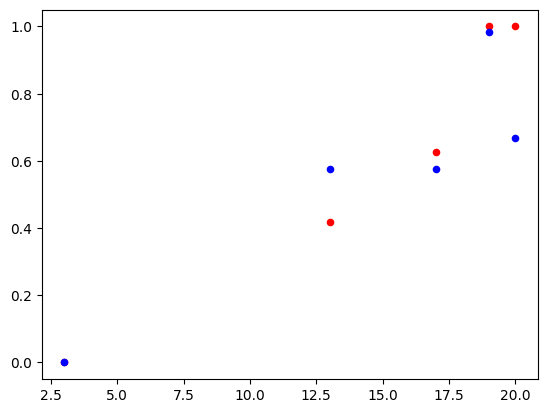

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_1.index, y_test_1, c = 'r', s = 20)
plt.scatter(y_test_1.index, y_pred_1, c = 'b', s = 20)

In [ ]:
rf_1_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MSE': mean_squared_error(y_test_1, y_pred_1),
   'MAE': mean_absolute_error(y_test_1, y_pred_1),
   'R2 score': rf_1_best.score(X_test_1, y_test_1).round(3)
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, rf_1_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,6.233333e-02,2.266667e-01,0.563
Прочность при растяжении,KNeighborsRegressor_pr,6.243004e-02,2.314815e-01,0.518
Модуль упругости при растяжении,SGDRegressor_upr,1.283970e-02,9.310538e-02,0.910
Прочность при растяжении,SGDRegressor_pr,7.001937e-03,7.352911e-02,0.946
Модуль упругости при растяжении,LinearRegression_upr,2.954099e-29,3.141931e-15,1.000
Прочность при растяжении,LinearRegression_pr,3.351072e-29,3.569367e-15,1.000
Модуль упругости при растяжении,RandomForestRegressor_upr,2.781571e-02,1.120357e-01,0.805


In [ ]:
# Создание модели случайного леса для модуля упругости при растяжении
rf_2 = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_1, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_2, y_train_2)

# Вывод наилучших параметров и оценки качества модели
rf_2_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_2_best.score(X_test_2, y_test_2).round(3)}')

y_pred_2 = rf_2_best.predict(X_test_2)

R2-score случайного леса: 0.759


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


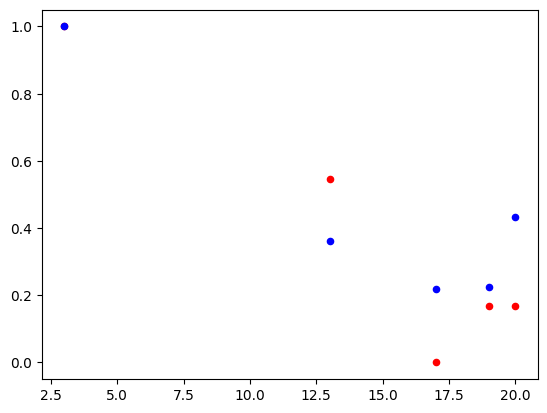

In [ ]:
# Визуализация разброса предсказанных данных и тестовых данных
plt.scatter(y_test_2.index, y_test_2, c = 'r', s = 20)
plt.scatter(y_test_2.index, y_pred_2, c = 'b', s = 20)

In [ ]:
rf_2_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MSE': mean_squared_error(y_test_2, y_pred_2),
   'MAE': mean_absolute_error(y_test_2, y_pred_2),
   'R2 score': rf_2_best.score(X_test_2, y_test_2).round(3)
}, index=['Прочность при растяжении'])
models = pd.concat([models, rf_2_result])

In [ ]:
models

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,6.233333e-02,2.266667e-01,0.563
Прочность при растяжении,KNeighborsRegressor_pr,6.243004e-02,2.314815e-01,0.518
Модуль упругости при растяжении,SGDRegressor_upr,1.283970e-02,9.310538e-02,0.910
Прочность при растяжении,SGDRegressor_pr,7.001937e-03,7.352911e-02,0.946
Модуль упругости при растяжении,LinearRegression_upr,2.954099e-29,3.141931e-15,1.000
Прочность при растяжении,LinearRegression_pr,3.351072e-29,3.569367e-15,1.000
Модуль упругости при растяжении,RandomForestRegressor_upr,2.781571e-02,1.120357e-01,0.805
Прочность при растяжении,RandomForestRegressor_pr,3.123474e-02,1.457407e-01,0.759


In [ ]:
#Выведем получившиеся данные
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

,Model,MSE,MAE,R2 score
Модуль упругости при растяжении,LinearRegression_upr,2.954099e-29,3.141931e-15,1.000
Прочность при растяжении,LinearRegression_pr,3.351072e-29,3.569367e-15,1.000
Прочность при растяжении,SGDRegressor_pr,7.001937e-03,7.352911e-02,0.946
Модуль упругости при растяжении,SGDRegressor_upr,1.283970e-02,9.310538e-02,0.910
Модуль упругости при растяжении,RandomForestRegressor_upr,2.781571e-02,1.120357e-01,0.805
Прочность при растяжении,RandomForestRegressor_pr,3.123474e-02,1.457407e-01,0.759
Модуль упругости при растяжении,KNeighborsRegressor_upr,6.233333e-02,2.266667e-01,0.563
Прочность при растяжении,KNeighborsRegressor_pr,6.243004e-02,2.314815e-01,0.518
